In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats
import seaborn as sns
import missingno as msno

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/input-data/kidney_disease.csv
/kaggle/input/inputdata/CleanedKidneyDisease.csv


In [2]:
data = pd.read_csv('../input/inputdata/CleanedKidneyDisease.csv')
data.head()

,Unnamed: 0,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,...,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease,Blood_Type
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,7800.0,5.2,yes,yes,no,good,no,no,ckd,O
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,6000.0,NaN,no,no,no,good,no,no,ckd,A
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,7500.0,NaN,no,yes,no,poor,no,yes,ckd,B
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,6700.0,3.9,yes,no,no,poor,yes,yes,ckd,O
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,7300.0,4.6,no,no,no,good,no,no,ckd,A


In [3]:
data.shape

(400, 27)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      400 non-null    int64  
 1   Age (yrs)                       391 non-null    float64
 2   Blood Pressure (mm/Hg)          388 non-null    float64
 3   Specific Gravity                353 non-null    float64
 4   Albumin                         354 non-null    float64
 5   Sugar                           351 non-null    float64
 6   Red Blood Cells                 248 non-null    object 
 7   Pus Cells                       335 non-null    object 
 8   Pus Cell Clumps                 396 non-null    object 
 9   Bacteria                        396 non-null    object 
 10  Blood Glucose Random (mgs/dL)   356 non-null    float64
 11  Blood Urea (mgs/dL)             381 non-null    float64
 12  Serum Creatinine (mgs/dL)       383 

In [5]:
data.describe()

,Unnamed: 0,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),Hemoglobin (gms),Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm)
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [6]:
for col in data.columns:
    print(f"\n\nUnique Values in {col}:")
    print(data[col].value_counts())



Unique Values in Unnamed: 0:
0      1
263    1
273    1
272    1
271    1
      ..
130    1
129    1
128    1
127    1
399    1
Name: Unnamed: 0, Length: 400, dtype: int64


Unique Values in Age (yrs):
60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: Age (yrs), Length: 76, dtype: int64


Unique Values in Blood Pressure (mm/Hg):
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: Blood Pressure (mm/Hg), dtype: int64


Unique Values in Specific Gravity:
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: Specific Gravity, dtype: int64


Unique Values in Albumin:
0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: Albumin, dtype: int64


Unique Values in Sugar:
0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: Sugar, dtype: int64


Unique Values in Red Blood Cells:
no

In [7]:
missing=data.isna().sum().sort_values(ascending=False)
print(missing)

Red Blood Cells                   152
Red Blood Cells (millions/cmm)    131
White Blood Cells (cells/cmm)     106
Potassium (mEq/L)                  88
Sodium (mEq/L)                     87
Packed Cell Volume                 71
Pus Cells                          65
Hemoglobin (gms)                   52
Sugar                              49
Specific Gravity                   47
Albumin                            46
Blood Glucose Random (mgs/dL)      44
Blood Urea (mgs/dL)                19
Serum Creatinine (mgs/dL)          17
Blood Pressure (mm/Hg)             12
Age (yrs)                           9
Bacteria                            4
Pus Cell Clumps                     4
Hypertension                        2
Diabetes Mellitus                   2
Coronary Artery Disease             2
Appetite                            1
Pedal Edema                         1
Anemia                              1
Chronic Kidney Disease              0
Unnamed: 0                          0
Blood_Type  

In [8]:
from matplotlib import style
style.available
style.use("seaborn-dark")

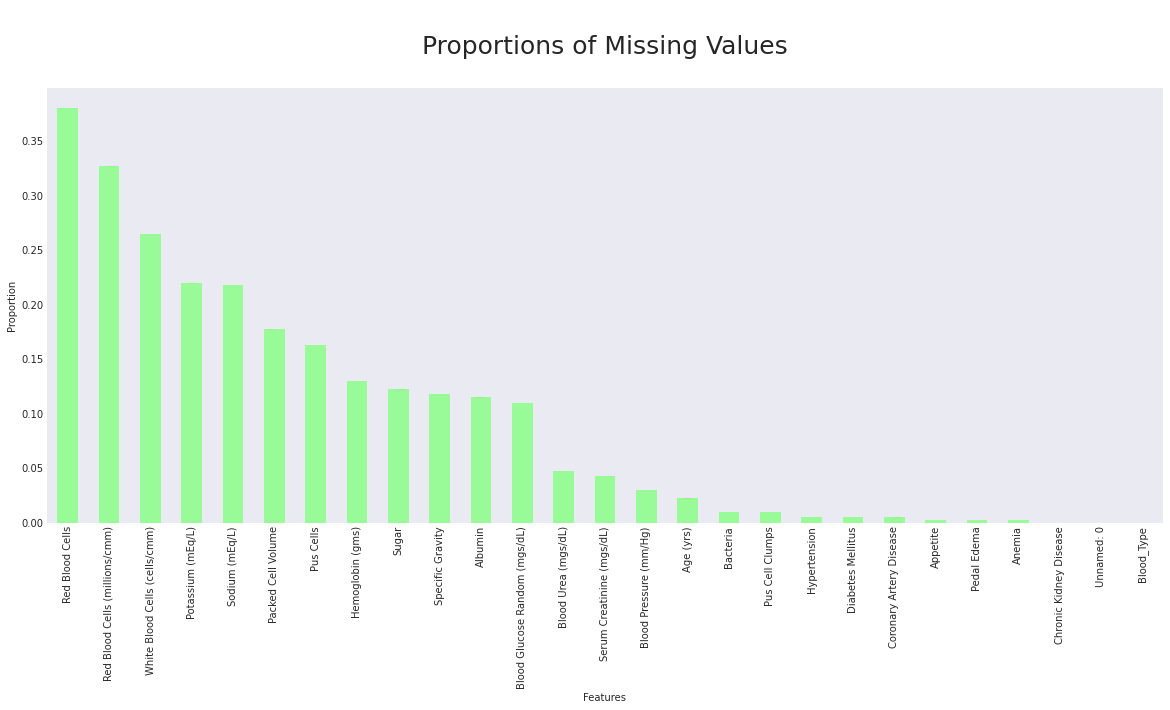

In [9]:
plt.figure(figsize=(20,8))
(missing/400).plot(kind="bar", color="palegreen") #400 is the number of patients/rows/examples/observations/lines in our data
#The "missing" variable contains the numbers of missing values, so we divide by 400 to get the proportions.
plt.title('\nProportions of Missing Values\n', fontsize=25)
plt.ylabel("Proportion")
plt.xlabel("Features")
plt.show()

In [10]:
data["Age (yrs)"].fillna(data["Age (yrs)"].mean(), inplace=True)
data["Blood Glucose Random (mgs/dL)"].fillna(data["Blood Glucose Random (mgs/dL)"].mode(), inplace=True)
data["Red Blood Cells"].fillna(data["Red Blood Cells"].mode()[0], inplace=True)
numerical=[]
for col in data.columns:
    if data[col].dtype=="float64":
        numerical.append(col)
print(numerical)
categorical=[]
for col in data.columns:
    if data[col].dtype=="object":
        categorical.append(col)
print(categorical)
for col in data.columns:
    if col in numerical:
        data[col].fillna(data[col].median(), inplace=True)
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)

['Age (yrs)', 'Blood Pressure (mm/Hg)', 'Specific Gravity', 'Albumin', 'Sugar', 'Blood Glucose Random (mgs/dL)', 'Blood Urea (mgs/dL)', 'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)', 'Potassium (mEq/L)', 'Hemoglobin (gms)', 'Packed Cell Volume', 'White Blood Cells (cells/cmm)', 'Red Blood Cells (millions/cmm)']
['Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia', 'Chronic Kidney Disease', 'Blood_Type']


In [11]:
data.isna().sum()

Unnamed: 0                        0
Age (yrs)                         0
Blood Pressure (mm/Hg)            0
Specific Gravity                  0
Albumin                           0
Sugar                             0
Red Blood Cells                   0
Pus Cells                         0
Pus Cell Clumps                   0
Bacteria                          0
Blood Glucose Random (mgs/dL)     0
Blood Urea (mgs/dL)               0
Serum Creatinine (mgs/dL)         0
Sodium (mEq/L)                    0
Potassium (mEq/L)                 0
Hemoglobin (gms)                  0
Packed Cell Volume                0
White Blood Cells (cells/cmm)     0
Red Blood Cells (millions/cmm)    0
Hypertension                      0
Diabetes Mellitus                 0
Coronary Artery Disease           0
Appetite                          0
Pedal Edema                       0
Anemia                            0
Chronic Kidney Disease            0
Blood_Type                        0
dtype: int64

In [12]:
data.corr()

,Unnamed: 0,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),Hemoglobin (gms),Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm)
Unnamed: 0,1.000000,-0.184043,-0.245378,0.582504,-0.468924,-0.247181,-0.297213,-0.299054,-0.263262,0.316549,-0.071029,0.607231,0.566986,-0.151808,0.495639
Age (yrs),-0.184043,1.000000,0.136734,-0.159073,0.084416,0.187615,0.230858,0.192809,0.133438,-0.085760,0.049753,-0.175166,-0.210241,0.094021,-0.202592
Blood Pressure (mm/Hg),-0.245378,0.136734,1.000000,-0.166980,0.123518,0.189561,0.150180,0.180841,0.143184,-0.100705,0.063667,-0.279303,-0.289237,0.022177,-0.219317
Specific Gravity,0.582504,-0.159073,-0.166980,1.000000,-0.479962,-0.292053,-0.299413,-0.244995,-0.171998,0.210791,-0.052935,0.490699,0.496434,-0.195068,0.432222
Albumin,-0.468924,0.084416,0.123518,-0.479962,1.000000,0.287751,0.293150,0.347418,0.161310,-0.225612,0.107893,-0.474399,-0.473446,0.202920,-0.405092
Sugar,-0.247181,0.187615,0.189561,-0.292053,0.287751,1.000000,0.627002,0.126897,0.096434,-0.051758,0.177396,-0.156807,-0.181285,0.156649,-0.161994
Blood Glucose Random (mgs/dL),-0.297213,0.230858,0.150180,-0.299413,0.293150,0.627002,1.000000,0.118859,0.068886,-0.130569,0.052732,-0.254435,-0.258200,0.119881,-0.214094
Blood Urea (mgs/dL),-0.299054,0.192809,0.180841,-0.244995,0.347418,0.126897,0.118859,1.000000,0.581517,-0.308806,0.339771,-0.541635,-0.523091,0.038362,-0.465243
Serum Creatinine (mgs/dL),-0.263262,0.133438,0.143184,-0.171998,0.161310,0.096434,0.068886,0.581517,1.000000,-0.624036,0.204751,-0.342492,-0.338611,-0.010333,-0.321737
Sodium (mEq/L),0.316549,-0.085760,-0.100705,0.210791,-0.225612,-0.051758,-0.130569,-0.308806,-0.624036,1.000000,0.069612,0.331483,0.343555,0.008010,0.313929


In [13]:
data['Chronic Kidney Disease'].value_counts()

ckd       250
notckd    150
Name: Chronic Kidney Disease, dtype: int64

<AxesSubplot:ylabel='Frequency'>

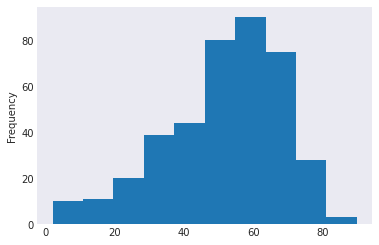

In [14]:
data['Age (yrs)'].plot(kind='hist')

<AxesSubplot:>

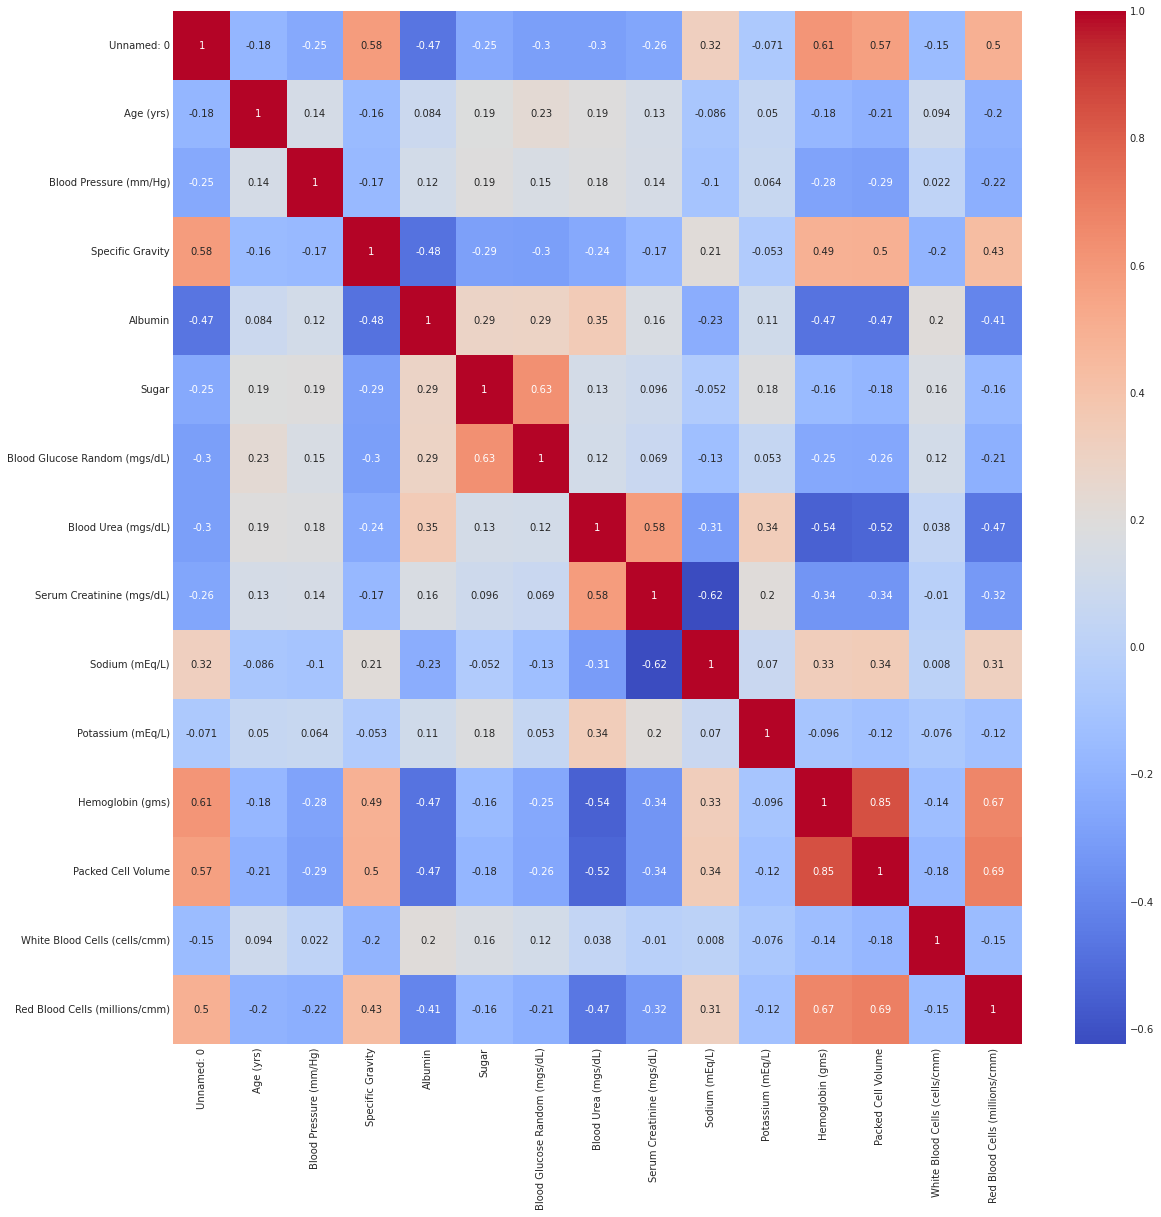

In [15]:
plt.figure(figsize = (19,19))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

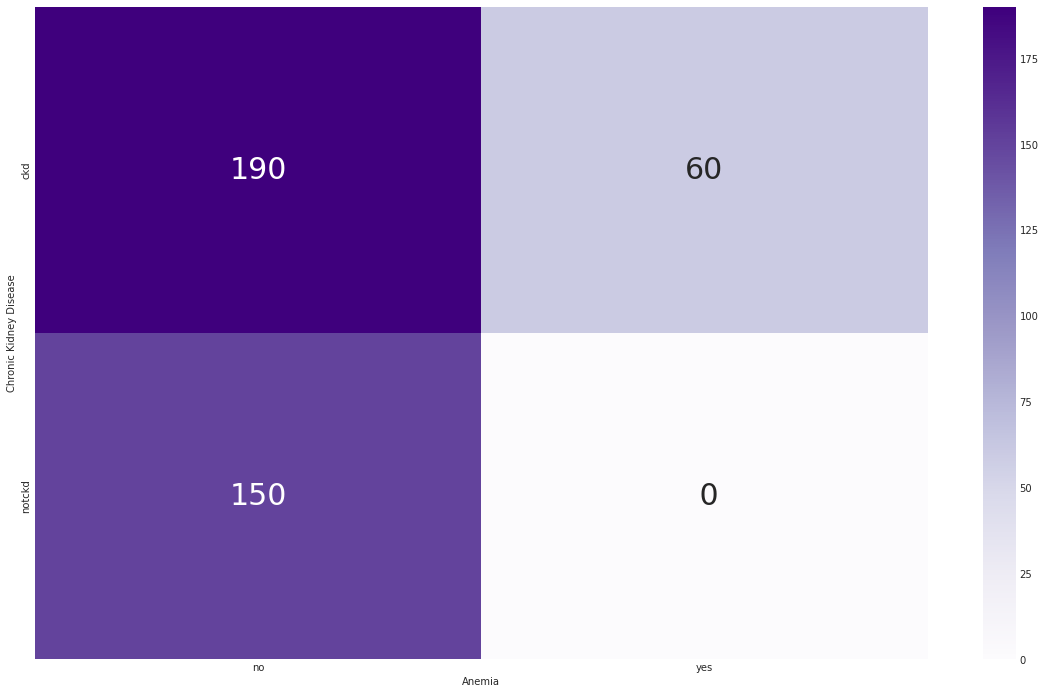

In [16]:
plt.figure(figsize=(20,12))
sns.heatmap(pd.crosstab(data["Chronic Kidney Disease"], data['Anemia']), cmap="Purples", annot=True, annot_kws={"fontsize":30}, fmt='2')
plt.show()

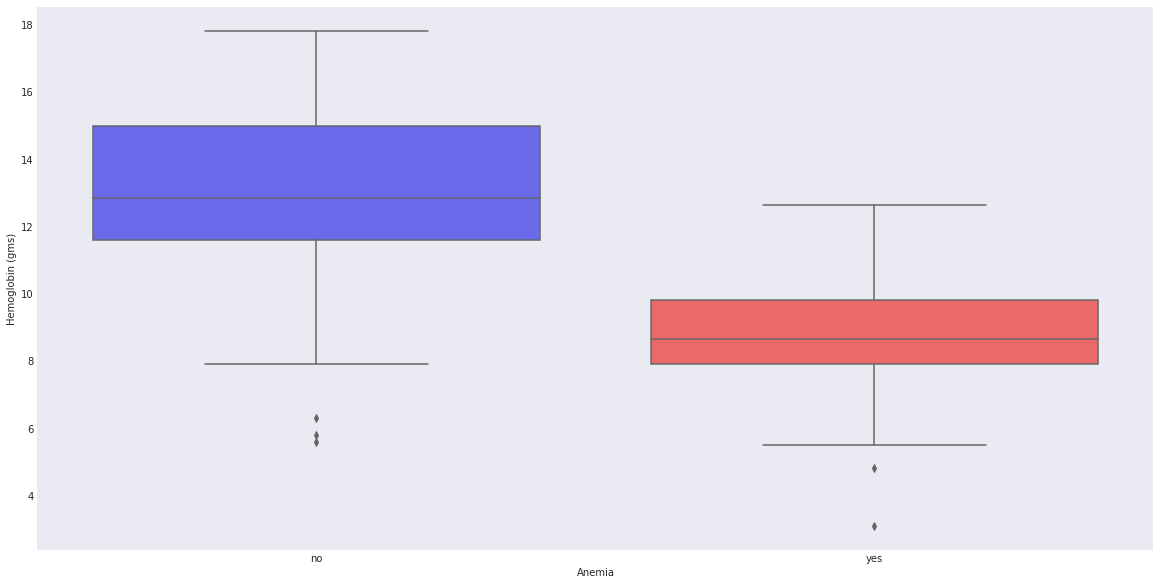

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data, x="Anemia", y="Hemoglobin (gms)", palette='seismic')
plt.show()

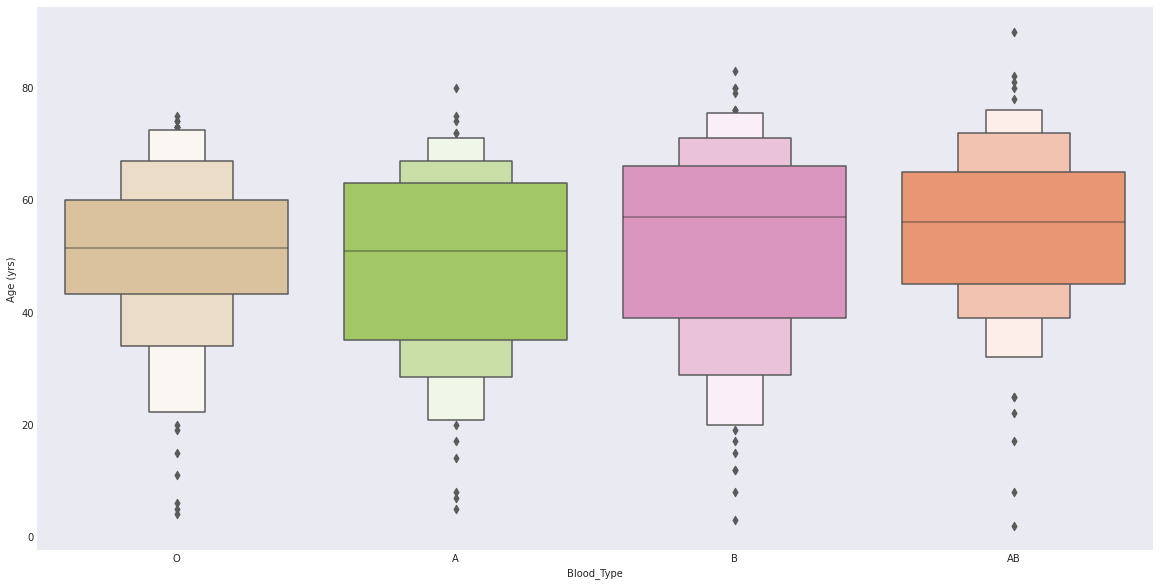

In [18]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=data, x="Blood_Type", y="Age (yrs)", palette='Set2_r')
plt.show()

In [19]:
from sklearn.feature_selection import mutual_info_classif
print("Mutual Information between 'Chronic Kidney Disease' and continuous features: \n")
mi = mutual_info_classif(data[numerical], data["Chronic Kidney Disease"])
mi_dataframe = pd.DataFrame(mi, columns=["Chronic Kidney Disease"], index=numerical)
mi_dataframe

Mutual Information between 'Chronic Kidney Disease' and continuous features: 



,Chronic Kidney Disease
Age (yrs),0.081564
Blood Pressure (mm/Hg),0.174136
Specific Gravity,0.334121
Albumin,0.243496
Sugar,0.078174
Blood Glucose Random (mgs/dL),0.174494
Blood Urea (mgs/dL),0.147671
Serum Creatinine (mgs/dL),0.380598
Sodium (mEq/L),0.238730
Potassium (mEq/L),0.190501


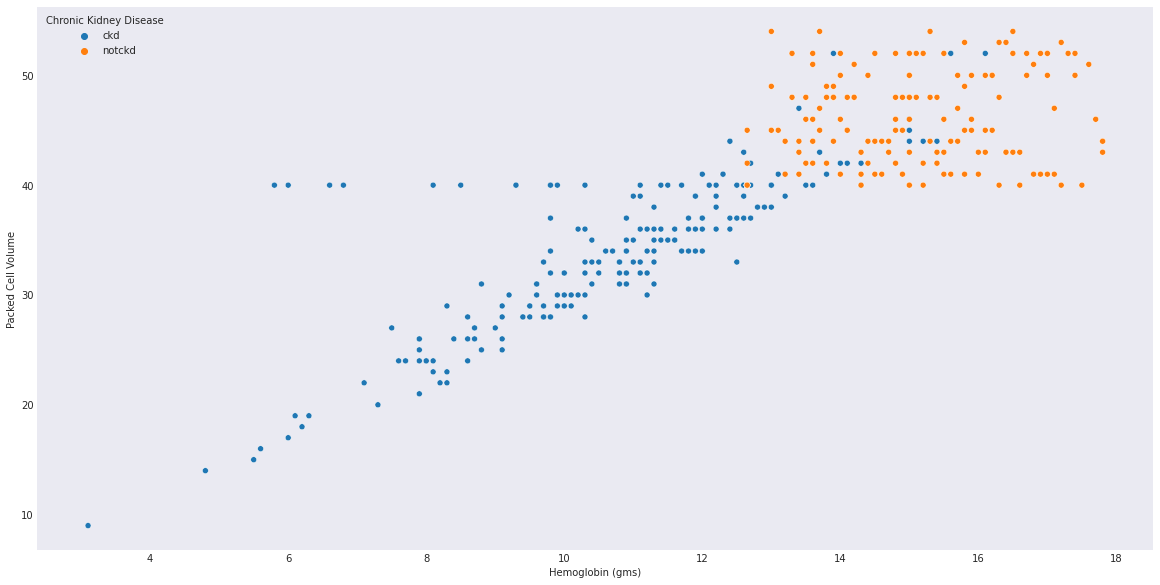

In [20]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x='Hemoglobin (gms)', y="Packed Cell Volume", hue="Chronic Kidney Disease")
plt.show()

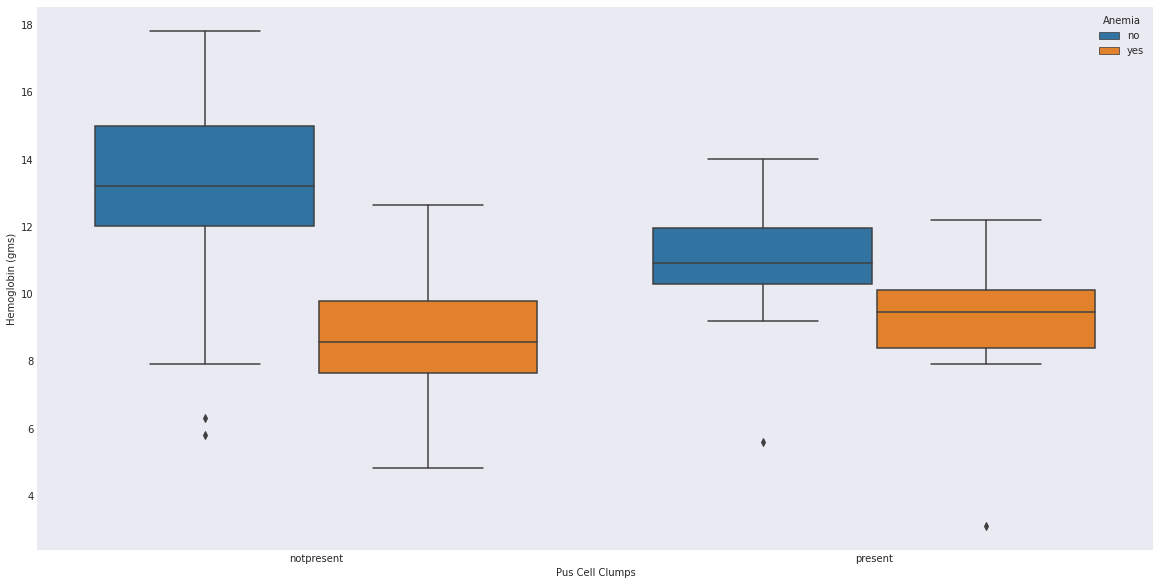

In [21]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data, y='Hemoglobin (gms)', x="Pus Cell Clumps", hue="Anemia")
plt.show()

In [22]:
data['Chronic Kidney Disease'] = data['Chronic Kidney Disease'].map({'ckd':1,'notckd':0})
data['Hypertension'] = data['Hypertension'].map({'yes':1,'no':0})
data['Diabetes Mellitus'] = data['Diabetes Mellitus'].map({'yes':1,'no':0})
data['Coronary Artery Disease'] = data['Coronary Artery Disease'].map({'yes':1,'no':0})
data['Appetite'] = data['Appetite'].map({'good':1,'poor':0})
data['Anemia'] = data['Anemia'].map({'yes':1,'no':0})
data['Pedal Edema'] = data['Pedal Edema'].map({'yes':1,'no':0})
data['Bacteria'] = data['Bacteria'].map({'present':1,'notpresent':0})
data['Pus Cell Clumps'] = data['Pus Cell Clumps'].map({'present':1,'notpresent':0})
data['Pus Cells'] = data['Pus Cells'].map({'abnormal':1,'normal':0})
data['Red Blood Cells'] = data['Red Blood Cells'].map({'abnormal':1,'normal':0})
data['Chronic Kidney Disease'].value_counts()

1    250
0    150
Name: Chronic Kidney Disease, dtype: int64